In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

*Here We are importing the data*

We have decided to import the train and the test wine data

In [2]:
wine_train=pd.read_csv('Datasets/train.csv')
wine_test=pd.read_csv('Datasets/test.csv')


**Head of test data and train data**

In [3]:
wine_test.head(1)

,index,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,id
0,41855,US,"Sweet new oak stands out, giving this Cabernet...",3D,95.036469,NaN,California,St. Helena,Napa,NaN,NaN,Salvestrin 2007 3D Cabernet Sauvignon (St. Hel...,CABERNET SAUVIGNON,Salvestrin,0


In [4]:
wine_train.head(1)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,id
0,Portugal,This is a fine rich balanced wine. It has ripe...,Vila Santa Reserva,88.870874,20.0,Alentejano,NaN,NaN,NaN,NaN,NaN,PORTUGUESE RED,J. Portugal Ramos,32027


**Data train info**

In [5]:
wine_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 14 columns):
country                  174953 non-null object
description              175000 non-null object
designation              122734 non-null object
points                   175000 non-null float64
price                    175000 non-null float64
province                 174953 non-null object
region_1                 146466 non-null object
region_2                 75394 non-null object
taster_name              65509 non-null object
taster_twitter_handle    62190 non-null object
title                    82189 non-null object
variety                  174999 non-null object
winery                   175000 non-null object
id                       175000 non-null int64
dtypes: float64(2), int64(1), object(11)
memory usage: 18.7+ MB


Data Description

In [6]:
wine_train.describe()

,points,price,id
count,175000.000000,175000.000000,175000.000000
mean,88.083987,34.304400,70684.047240
std,3.157001,38.398146,41341.638798
min,79.636128,4.000000,1.000000
25%,85.971283,16.000000,35020.000000
50%,87.981631,25.000000,70256.500000
75%,90.085631,40.000000,105550.250000
max,100.220603,2500.000000,150929.000000


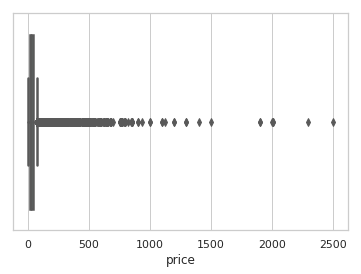

In [7]:
sns.set(style="whitegrid")
sns.boxplot(x=wine_train['price'],orient="h", palette="Set2",linewidth=2.5)

## Delete some columns

In [8]:
wine_train=wine_train.drop('taster_name',axis=1)
wine_train=wine_train.drop('taster_twitter_handle',axis=1)
#wine_train

## Normalized price variable

In [9]:
import numpy as np
y_prices = wine_train['price']
N_price = (y_prices - np.min(y_prices))/(np.max(y_prices)-np.min(y_prices))
#wine_train['price']=N_price

#wine_train['price']=wine

a=wine_train[wine_train.price>=700].index
wine_train=wine_train.drop(wine_train.index[a])


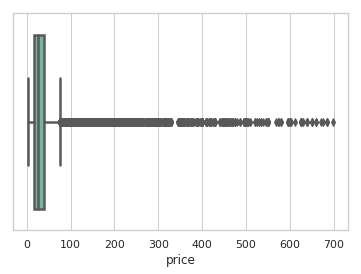

In [10]:
sns.boxplot(x=wine_train['price'],orient="h", palette="Set2",linewidth=2.5)

In [11]:
wine_train.describe()

,points,price,id
count,174952.000000,174952.000000,174952.000000
mean,88.081846,34.016450,70688.296173
std,3.154443,33.381668,41341.550742
min,79.636128,4.000000,1.000000
25%,85.971108,16.000000,35026.750000
50%,87.981384,25.000000,70263.000000
75%,90.084911,40.000000,105555.250000
max,100.199331,698.000000,150929.000000


**Install Package to use for**

In [12]:
#!pip install catboost

The Model that we are going to implement is the cat Boost regression Model

In [13]:
from catboost import CatBoostRegressor

**Code to identify the missing values in our train dataset**

In [14]:
wine_train.isnull().sum()

country           47
description        0
designation    52241
points             0
price              0
province          47
region_1       28524
region_2       99560
title          92789
variety            1
winery             0
id                 0
dtype: int64

In [15]:
wine_train.head(1)

,country,description,designation,points,price,province,region_1,region_2,title,variety,winery,id
0,Portugal,This is a fine rich balanced wine. It has ripe...,Vila Santa Reserva,88.870874,20.0,Alentejano,NaN,NaN,NaN,PORTUGUESE RED,J. Portugal Ramos,32027


In [16]:
#wine_train['region_1']

In [17]:
wine_train['variety']=pd.Categorical(wine_train['variety'])
wine_train["variety"] = wine_train.variety.cat.codes


wine_train['province']=pd.Categorical(wine_train['province'])
wine_train["province"] = wine_train.province.cat.codes

wine_train['designation']=pd.Categorical(wine_train['designation'])
wine_train["designation"] = wine_train.designation.cat.codes

wine_train['country']=pd.Categorical(wine_train['country'])
wine_train["country"] = wine_train.country.cat.codes



wine_train['winery']=pd.Categorical(wine_train['winery'])
wine_train["winery"] = wine_train.winery.cat.codes

wine_train['description']=pd.Categorical(wine_train['description'])
wine_train["description"] = wine_train.description.cat.codes


wine_train['region_1']=pd.Categorical(wine_train['region_1'])
wine_train["region_1"] = wine_train.region_1.cat.codes

wine_train['region_2']=pd.Categorical(wine_train['region_2'])
wine_train["region_2"] = wine_train.region_2.cat.codes

In [18]:
#wine_train['title']

#  Check about the percentage of missing values in the dataset

In [19]:
print("We have {:.4} % of missing values in the feature region1".format(wine_train.region_1.isnull().sum()*100/wine_train.index.nunique()))

We have 0.0 % of missing values in the feature region1


In [20]:
print("We have {:.4} % of missing values in the feature region2".format(wine_train.region_2.isnull().sum()*100/wine_train.index.nunique()))

We have 0.0 % of missing values in the feature region2


Let us declare our model variable and the corresponding features

In [21]:
y=wine_train['price']
X=wine_train[['description','designation','points','province'
              ,'country','variety','winery','region_1','region_2']]
    
#X=wine_train[['points','winery','designation']]

#wine_test['taster_name']

Let's Train the model

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)



Building the model by using CatBoost package

In [23]:
#model_cat = CatBoostRegressor(iterations=600, learning_rate=0.03)
model_cat = CatBoostRegressor()

In [24]:
model_cat

In [25]:
model_cat.fit(X_train,y_train)

0:	learn: 32.8872411	total: 57.2ms	remaining: 57.2s
1:	learn: 32.5565091	total: 68.4ms	remaining: 34.1s
2:	learn: 32.2201100	total: 82.8ms	remaining: 27.5s
3:	learn: 31.9128111	total: 92ms	remaining: 22.9s
4:	learn: 31.6070225	total: 105ms	remaining: 20.8s
5:	learn: 31.3195854	total: 115ms	remaining: 19.1s
6:	learn: 31.0435240	total: 123ms	remaining: 17.5s
7:	learn: 30.7822472	total: 132ms	remaining: 16.3s
8:	learn: 30.5293291	total: 140ms	remaining: 15.4s
9:	learn: 30.2891561	total: 152ms	remaining: 15s
10:	learn: 30.0536520	total: 161ms	remaining: 14.4s
11:	learn: 29.8259544	total: 169ms	remaining: 13.9s
12:	learn: 29.6229636	total: 177ms	remaining: 13.4s
13:	learn: 29.4142341	total: 185ms	remaining: 13s
14:	learn: 29.2151457	total: 193ms	remaining: 12.7s
15:	learn: 29.0306801	total: 202ms	remaining: 12.4s
16:	learn: 28.8407924	total: 210ms	remaining: 12.1s
17:	learn: 28.6671417	total: 218ms	remaining: 11.9s
18:	learn: 28.5060850	total: 226ms	remaining: 11.7s
19:	learn: 28.3502525	to

171:	learn: 23.3453002	total: 1.7s	remaining: 8.2s
172:	learn: 23.3422115	total: 1.72s	remaining: 8.21s
173:	learn: 23.3365930	total: 1.73s	remaining: 8.22s
174:	learn: 23.3297952	total: 1.74s	remaining: 8.22s
175:	learn: 23.3247767	total: 1.75s	remaining: 8.21s
176:	learn: 23.3168135	total: 1.77s	remaining: 8.22s
177:	learn: 23.3110790	total: 1.79s	remaining: 8.25s
178:	learn: 23.3027119	total: 1.8s	remaining: 8.25s
179:	learn: 23.2945855	total: 1.81s	remaining: 8.25s
180:	learn: 23.2886200	total: 1.82s	remaining: 8.23s
181:	learn: 23.2814558	total: 1.83s	remaining: 8.24s
182:	learn: 23.2714768	total: 1.85s	remaining: 8.24s
183:	learn: 23.2621644	total: 1.85s	remaining: 8.22s
184:	learn: 23.2548806	total: 1.87s	remaining: 8.24s
185:	learn: 23.2500501	total: 1.88s	remaining: 8.24s
186:	learn: 23.2470521	total: 1.89s	remaining: 8.24s
187:	learn: 23.2389392	total: 1.9s	remaining: 8.23s
188:	learn: 23.2305310	total: 1.92s	remaining: 8.23s
189:	learn: 23.2181468	total: 1.93s	remaining: 8.2

336:	learn: 22.4589731	total: 3.35s	remaining: 6.59s
337:	learn: 22.4526520	total: 3.36s	remaining: 6.58s
338:	learn: 22.4494398	total: 3.37s	remaining: 6.57s
339:	learn: 22.4451823	total: 3.38s	remaining: 6.55s
340:	learn: 22.4424358	total: 3.38s	remaining: 6.54s
341:	learn: 22.4363005	total: 3.39s	remaining: 6.52s
342:	learn: 22.4308286	total: 3.4s	remaining: 6.51s
343:	learn: 22.4266527	total: 3.41s	remaining: 6.5s
344:	learn: 22.4252187	total: 3.42s	remaining: 6.49s
345:	learn: 22.4225499	total: 3.43s	remaining: 6.48s
346:	learn: 22.4182353	total: 3.44s	remaining: 6.47s
347:	learn: 22.4151941	total: 3.44s	remaining: 6.45s
348:	learn: 22.4115974	total: 3.45s	remaining: 6.44s
349:	learn: 22.4056185	total: 3.46s	remaining: 6.43s
350:	learn: 22.4025377	total: 3.47s	remaining: 6.42s
351:	learn: 22.3969135	total: 3.48s	remaining: 6.4s
352:	learn: 22.3950256	total: 3.49s	remaining: 6.39s
353:	learn: 22.3918341	total: 3.49s	remaining: 6.37s
354:	learn: 22.3892468	total: 3.5s	remaining: 6.3

502:	learn: 21.9018287	total: 4.76s	remaining: 4.7s
503:	learn: 21.8988637	total: 4.77s	remaining: 4.69s
504:	learn: 21.8968042	total: 4.78s	remaining: 4.68s
505:	learn: 21.8941454	total: 4.79s	remaining: 4.68s
506:	learn: 21.8915315	total: 4.8s	remaining: 4.67s
507:	learn: 21.8883998	total: 4.82s	remaining: 4.67s
508:	learn: 21.8864987	total: 4.83s	remaining: 4.66s
509:	learn: 21.8831976	total: 4.84s	remaining: 4.65s
510:	learn: 21.8810408	total: 4.85s	remaining: 4.64s
511:	learn: 21.8774175	total: 4.86s	remaining: 4.63s
512:	learn: 21.8727845	total: 4.87s	remaining: 4.62s
513:	learn: 21.8706392	total: 4.88s	remaining: 4.62s
514:	learn: 21.8683622	total: 4.89s	remaining: 4.61s
515:	learn: 21.8638492	total: 4.9s	remaining: 4.6s
516:	learn: 21.8618231	total: 4.92s	remaining: 4.59s
517:	learn: 21.8595295	total: 4.92s	remaining: 4.58s
518:	learn: 21.8561564	total: 4.94s	remaining: 4.58s
519:	learn: 21.8528843	total: 4.95s	remaining: 4.57s
520:	learn: 21.8504668	total: 4.96s	remaining: 4.5

677:	learn: 21.4562531	total: 6.37s	remaining: 3.03s
678:	learn: 21.4535502	total: 6.38s	remaining: 3.02s
679:	learn: 21.4507585	total: 6.39s	remaining: 3.01s
680:	learn: 21.4496516	total: 6.4s	remaining: 3s
681:	learn: 21.4478454	total: 6.41s	remaining: 2.99s
682:	learn: 21.4454227	total: 6.42s	remaining: 2.98s
683:	learn: 21.4432318	total: 6.42s	remaining: 2.97s
684:	learn: 21.4399691	total: 6.43s	remaining: 2.96s
685:	learn: 21.4388837	total: 6.44s	remaining: 2.95s
686:	learn: 21.4362658	total: 6.45s	remaining: 2.94s
687:	learn: 21.4347172	total: 6.46s	remaining: 2.93s
688:	learn: 21.4324792	total: 6.46s	remaining: 2.92s
689:	learn: 21.4299228	total: 6.47s	remaining: 2.91s
690:	learn: 21.4271947	total: 6.48s	remaining: 2.9s
691:	learn: 21.4248213	total: 6.49s	remaining: 2.89s
692:	learn: 21.4222746	total: 6.5s	remaining: 2.88s
693:	learn: 21.4199119	total: 6.51s	remaining: 2.87s
694:	learn: 21.4169093	total: 6.52s	remaining: 2.86s
695:	learn: 21.4144972	total: 6.53s	remaining: 2.85s

855:	learn: 21.0838785	total: 7.99s	remaining: 1.34s
856:	learn: 21.0817574	total: 8s	remaining: 1.33s
857:	learn: 21.0803446	total: 8.01s	remaining: 1.32s
858:	learn: 21.0790859	total: 8.02s	remaining: 1.32s
859:	learn: 21.0778328	total: 8.02s	remaining: 1.31s
860:	learn: 21.0760159	total: 8.03s	remaining: 1.3s
861:	learn: 21.0731773	total: 8.04s	remaining: 1.29s
862:	learn: 21.0704935	total: 8.05s	remaining: 1.28s
863:	learn: 21.0692459	total: 8.06s	remaining: 1.27s
864:	learn: 21.0681786	total: 8.06s	remaining: 1.26s
865:	learn: 21.0667428	total: 8.07s	remaining: 1.25s
866:	learn: 21.0644179	total: 8.08s	remaining: 1.24s
867:	learn: 21.0625867	total: 8.09s	remaining: 1.23s
868:	learn: 21.0613150	total: 8.09s	remaining: 1.22s
869:	learn: 21.0587326	total: 8.1s	remaining: 1.21s
870:	learn: 21.0564492	total: 8.11s	remaining: 1.2s
871:	learn: 21.0526746	total: 8.12s	remaining: 1.19s
872:	learn: 21.0516967	total: 8.13s	remaining: 1.18s
873:	learn: 21.0510794	total: 8.13s	remaining: 1.17s

Model evaluation

In [26]:
preds = model_cat.predict(X_test)

preds
#import numpy as np
#np.shape(wine_train)
#len(preds)
#preds

array([30.97156165, 36.82988847, 12.66416369, ..., 35.16954446,
       20.01777059, 29.34723379])

In [27]:

from sklearn import metrics
print (metrics.mean_absolute_error(preds,y_test))
print(np.sqrt(metrics.mean_squared_error(preds,y_test)))
len(preds)
#len(y_test) 23.00807804423797

11.499400924840197
22.54846732637354


34991

In [28]:
from sklearn.metrics import accuracy_score
result = {'Model Regression\'s accuracy {}'.format(accuracy_score(preds.round(),y_test)*100,normalize=False)}
result

{"Model Regression's accuracy 3.723814695207339"}

In [29]:
print(result,'%')

{"Model Regression's accuracy 3.723814695207339"} %


# Testing

In [30]:
wine_test['variety']=pd.Categorical(wine_test['variety'])
wine_test["variety"] = wine_test.variety.cat.codes


wine_test['province']=pd.Categorical(wine_test['province'])
wine_test["province"] = wine_test.province.cat.codes

wine_test['designation']=pd.Categorical(wine_test['designation'])
wine_test["designation"] = wine_test.designation.cat.codes

wine_test['country']=pd.Categorical(wine_test['country'])
wine_test["country"] = wine_test.country.cat.codes



wine_test['winery']=pd.Categorical(wine_test['winery'])
wine_test["winery"] = wine_test.winery.cat.codes

wine_test['description']=pd.Categorical(wine_test['description'])
wine_test["description"] = wine_test.description.cat.codes

wine_test['region_1']=pd.Categorical(wine_test['region_1'])
wine_test["region_1"] = wine_test.region_1.cat.codes

wine_test['region_2']=pd.Categorical(wine_test['region_2'])
wine_test["region_2"] = wine_test.region_2.cat.codes
#wine_train['region_1']=pd.Categorical(wine_train['region_1'])



In [31]:
wine_test_selected = wine_test[['description','designation','points','province'
              ,'country','variety','winery','region_1','region_2']]
#wine_test_selected=wine_test.drop('price',axis=1)  
#X=wine_train[['points','winery','designation']]


In [32]:
preds = model_cat.predict(wine_test_selected)
preds

array([128.71006769,  47.63407875,  42.69748715, ...,  36.92259521,
        19.35596559,  49.38747643])

In [33]:
len(preds)

83210

In [34]:
#from sklearn import metrics
#print (metrics.mean_absolute_error(preds,y_test))

In [35]:
wine_test.id

0            0
1            1
2            2
3            3
4            4
         ...  
83205    83205
83206    83206
83207    83207
83208    83208
83209    83209
Name: id, Length: 83210, dtype: int64

In [36]:
type(preds)#.size

numpy.ndarray

In [37]:
preds.reshape(-1,1).shape

(83210, 1)

In [38]:
output = wine_test[['id']]
output['price']=preds.reshape(-1,1)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [39]:
output['price']

0        128.710068
1         47.634079
2         42.697487
3         40.908971
4         21.560034
            ...    
83205     29.566356
83206     43.779511
83207     36.922595
83208     19.355966
83209     49.387476
Name: price, Length: 83210, dtype: float64

In [40]:
output.to_csv('final_output.csv',index=False)

In [41]:
!ls

 catboost_info		      final_output_rf.csv
 Cat_boost_Regression.ipynb  'Group 1.ipynb'
 Datasets		     'K-fold Cross Validation.ipynb'
 final1_output.csv	      LICENSE
 final_output		      README.md
 final_output.csv	     'RF and others Models.ipynb'
 final_output_rf2.csv	     'XG Boost.ipynb'
 final_output_rf3.csv


In [42]:
wine_test.index.nunique()

83210

In [43]:
# result = {'Model Regression\'s accuracy {}'.format(accuracy_score(pred,y_test))}

In [44]:
import sklearn
print('sklearn: %s' % sklearn.__version__)

sklearn: 0.20.2
